# Cluster Analysis

This notebook contains:

1. Importing libraries and data
2. Standardizing Data
3. Elbow Technique
4. K-means clustering
5. Statistics

# 1. Importing libraries and Data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl
import scipy
from scipy import stats

In [7]:
%matplotlib inline

In [8]:
path = 'C:/Users/Owner/OneDrive/Desktop/Data Analytics/Achievement 6'

In [9]:
df = pd.read_csv(os.path.join(path, 'WAhousing.csv'))

In [10]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,County,City,lat,long,sqft_living15,sqft_lot15
0,15134,3353400840,12/2/2014,230000,6,1.50,2140,36509,1.5,0,...,0,1903,1979,98001,King,Auburn,47.2668,-122.252,1710,12000
1,3868,1311000600,9/25/2014,250000,5,1.75,2320,7700,1.0,0,...,1030,1962,0,98001,King,Auburn,47.3426,-122.285,1740,7210
2,4855,6181430280,9/15/2014,330000,5,2.50,3597,4972,2.0,0,...,0,2006,0,98001,King,Auburn,47.3002,-122.282,3193,6000
3,5672,3914000095,7/18/2014,430000,5,2.50,3860,42733,1.0,0,...,1560,1955,0,98001,King,Auburn,47.3117,-122.254,2520,19353
4,6579,321049090,6/26/2014,254000,5,2.00,2080,16117,1.0,0,...,340,1959,0,98001,King,Auburn,47.3424,-122.289,1510,13068


In [11]:
#Create a subgroup
sub = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built']]

# 2. Standardizing Data

In [12]:
df['price'] = (df['price'] - df['price'].mean())/df['price'].std()

In [13]:
sub.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built
0,230000,6,1.50,2140,1.5,1903
1,250000,5,1.75,2320,1.0,1962
2,330000,5,2.50,3597,2.0,2006
3,430000,5,2.50,3860,1.0,1955
4,254000,5,2.00,2080,1.0,1959


In [14]:
sub.shape

(21613, 6)

# Saving sub as a dataframe

In [15]:
sub.to_csv(os.path.join(path, 'sub.csv'))

In [16]:
# Import sub
sub = pd.read_csv(os.path.join(path, 'sub.csv'))

# 3. Elbow Technique

In [17]:
num_cl = range(1, 10)
kmeans= [KMeans(n_clusters=i) for i in num_cl]

In [18]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]
score

[-2913776336285916.0,
 -1355947507033667.2,
 -731202857481839.2,
 -461618941998252.94,
 -325109018414677.4,
 -238390423106038.97,
 -180019964991427.78,
 -136679632934999.03,
 -111699841542080.48]

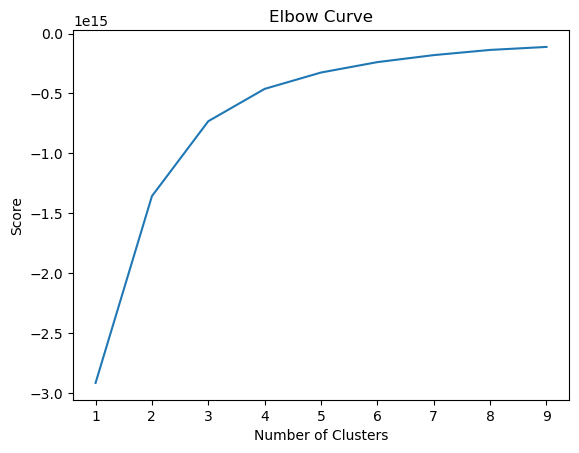

In [19]:
#Plotting the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Because the slope increaseas drastically up to 4 and then straightens out, I've determined the optimal number of clusters to be 4.

# 4. K-means clustering

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [21]:
# Fit the k-means objects to the data.

kmeans.fit(sub)

KMeans(n_clusters=4)

In [22]:
sub['clusters'] = kmeans.fit_predict(sub)

In [23]:
sub.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,floors,yr_built,clusters
0,0,230000,6,1.50,2140,1.5,1903,1
1,1,250000,5,1.75,2320,1.0,1962,1
2,2,330000,5,2.50,3597,2.0,2006,1
3,3,430000,5,2.50,3860,1.0,1955,1
4,4,254000,5,2.00,2080,1.0,1959,1


In [24]:
sub['clusters'].value_counts()

1    12935
3     7259
0     1229
2      190
Name: clusters, dtype: int64

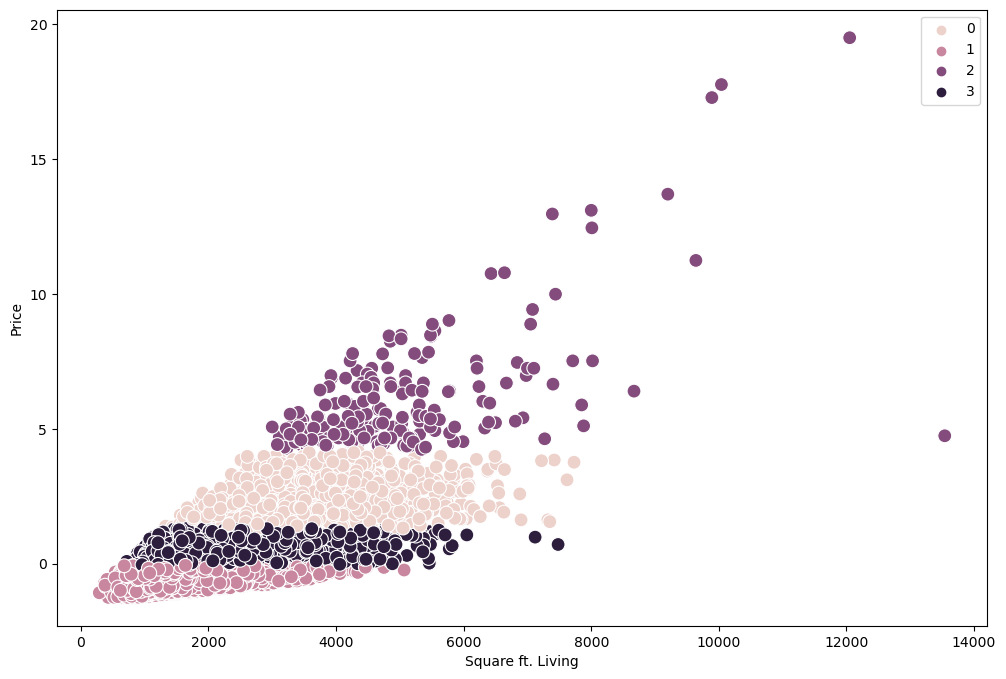

In [25]:
# Plot the clusters for the "price" and "sqft_living" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sqft_living'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Square ft. Living') 
plt.ylabel('Price') # Label y-axis.
plt.show()

The plot of sq. ft. living and price shows that price increases some for sq ft of living but not much. Most of the clusters show overlap in amount of square feet of living but with higher prices. There is some shift in price, but for the most part, the more expensive homes have the same amount of living area.

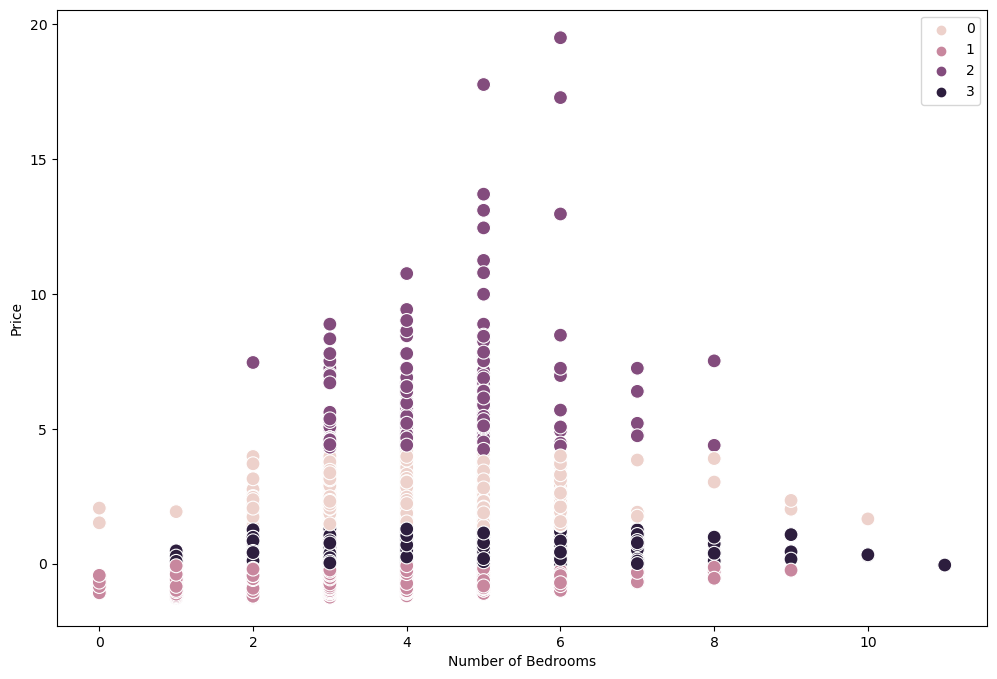

In [26]:
# Plot the clusters for the "number of bedrooms" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['bedrooms'], y=df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Bedrooms') 
plt.ylabel('Price') 
plt.show()

It seems like all the clusters are grouped together. The light pink is the main focus showing that price of the house increases up to five bedrooms, but then with the exception of a few points, the price decreases from houses with bedrooms of 6 or more. So we can glean that up to a point (5 bedrooms), price does in fact increase, but after that, the price decreases.

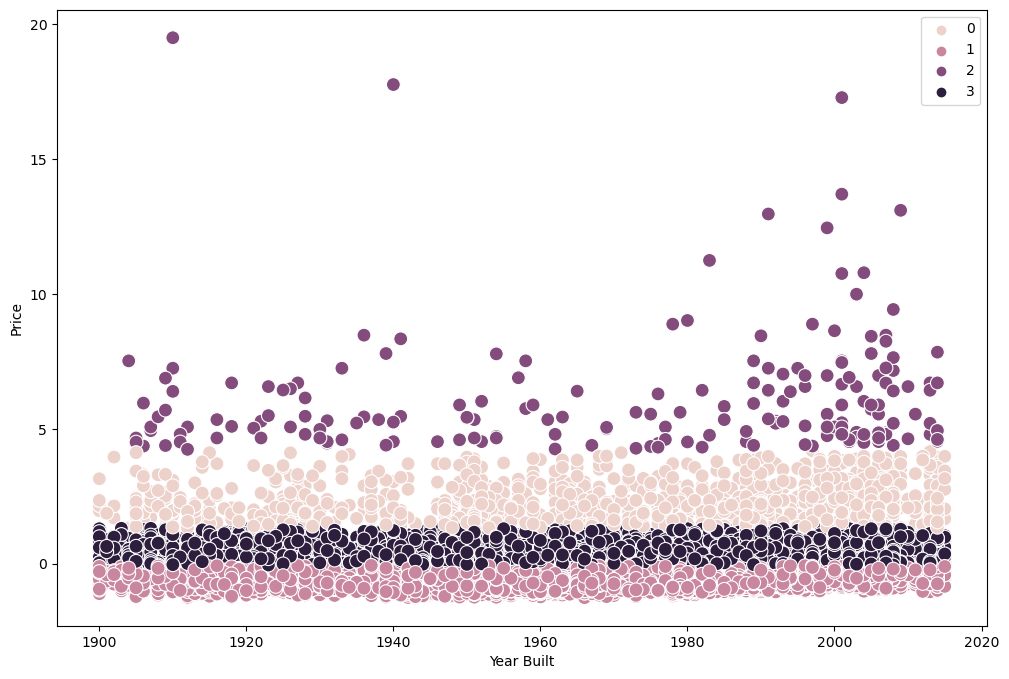

In [27]:
# Plot the clusters for the "year built" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['yr_built'], y=df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year Built') 
plt.ylabel('Price') 
plt.show()

I decided to plot the year built vs. price, and it's a lot of the same. You can see from the graph that year built does not necessarily lead to higher prices, on either end of the spectrum. There are slightly higher priced homes that were built later, but for the most part, the graph shows that year built does not effect the cost. All clusters are equally dispersed.

# 5. Statistics

In [28]:
sub.loc[sub['clusters'] == 3, 'cluster'] = 'dark pink'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

In [29]:
sub.groupby('clusters').agg({'price':['mean', 'median'], 
                         'bedrooms':['mean', 'median'], 
                         'sqft_living':['mean', 'median'],
                          'yr_built':['mean', 'median']})

price             bedrooms         sqft_living          \
                  mean     median      mean median         mean  median   
clusters                                                                  
0         1.358833e+06  1295000.0  4.031733    4.0  3632.033360  3530.0   
1         3.452584e+05   345000.0  3.158098    3.0  1677.105218  1600.0   
2         2.806109e+06  2528500.0  4.352632    4.0  5094.152632  4730.0   
3         6.893292e+05   660000.0  3.608210    4.0  2455.966249  2400.0   

             yr_built          
                 mean  median  
clusters                       
0         1975.282343  1985.0  
1         1970.328334  1970.0  
2         1972.257895  1986.5  
3         1971.454195  1978.0

From the statistics a few things can be seen including the square ft. of living being a big factor in price. Where the median price is over 2 million, the highest amount of living area is with the mean being about 5000 sq ft. It can also be seen that the mean year built for each cluster is about the same, and the prices vary, so year built does not indicate higher or lower price. Also, from the statistics, it can be seen that amount of bedrooms is roughly the same, but it did show in the plot that overall, number of bedrooms did make the price higher up to five bedrooms.

In [30]:
#Save sub
sub.to_csv(os.path.join(path, 'sub1.csv'))